In [85]:
import sys
sys.path.append('../src')

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [336]:
data = pd.read_csv('../data/kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [107]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [108]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

**id**: Unique ID for each home sold 

**date**: Date of the home sale  

**price**: Price of each home sold  

**bedrooms**: Number of bedrooms  

**bathrooms**: Number of bathrooms, where .5 accounts for a room with a toilet but no shower  

**sqft_living**: Square footage of the apartments interior living space  

**sqft_lot**: Square footage of the land space  

**floors**: Number of floors  

**waterfront**: A dummy variable for whether the apartment was overlooking the waterfront or not 

**view**: An index from 0 to 4 of how good the view of the property was  

**condition**: An index from 1 to 5 on the condition of the apartment  

**grade**: An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design  

**sqft_above**: The square footage of the interior housing space that is above ground level  

**sqft_basement**: The square footage of the interior housing space that is below ground level  

**yr_built**: The year the house was initially built  

**yr_renovated**: The year of the house’s last renovation  

**zipcode**: What zipcode area the house is in  

**lat**: Lattitude  

**long**: Longitude  

**sqft_living15**: The square footage of interior housing living space for the nearest 15 neighbors  

**sqft_lot15**: The square footage of the land lots of the nearest 15 neighbors  *

In [337]:
data['date'] = pd.to_datetime(data['date'])

In [338]:
data['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [339]:
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data['day'] = data['date'].dt.day
data['dayofweek'] = data['date'].dt.day_of_week

In [340]:
data.month.nunique(), data.year.nunique(), data.day.nunique(), data.dayofweek.nunique()

(12, 2, 31, 7)

In [341]:
data = data.drop('date', axis=1)

In [342]:
data = data.drop('id', axis=1)

In [343]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year', 'day', 'dayofweek'],
      dtype='object')

In [118]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
bedrooms,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01
bathrooms,21613.0,2.114757,0.770163,0.0000,1.750,2.2500,2.500,8.000000e+00
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
floors,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00
view,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01


In [120]:
data.corr()['price'].abs().sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
zipcode          0.053203
condition        0.036362
long             0.021626
day              0.014670
month            0.010081
year             0.003576
dayofweek        0.001695
Name: price, dtype: float64

In [121]:
y = data['price'].values
data = data.drop(['price'], axis=1)

In [186]:
random_state = 11

from sklearn.model_selection import train_test_split
data_train, data_val, y_train, y_val = train_test_split(data, y, shuffle=True, test_size=0.3, random_state=random_state)

In [187]:
print(data_train.shape)
print(data_val.shape)

(15129, 22)
(6484, 22)


In [215]:
categorical_features = ['zipcode']

In [216]:
from category_encoders.target_encoder import TargetEncoder
target_enc = TargetEncoder(cols=categorical_features)
target_enc.fit(data_train, y_train)
X_train, X_val = target_enc.transform(data_train), target_enc.transform(data_val)

/Users/zhenyanikishkina/Library/Python/3.9/lib/python/site-packages/category_encoders/target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/Users/zhenyanikishkina/Library/Python/3.9/lib/python/site-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [217]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(data_train, y_train)
mutual_info

array([0.29536798, 0.28595809, 0.31260723, 0.07044282, 0.67052376,
       0.        , 0.04803041, 0.28722462, 0.58933853, 0.21892879,
       0.05961511, 0.06671134, 0.00674513, 0.20995792, 0.31655015,
       0.07339241, 0.24554199, 0.0719389 , 0.02915286, 0.66578309,
       0.01029418, 0.08717096])

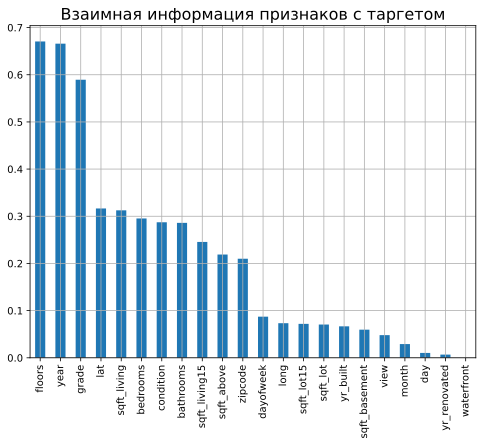

In [335]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = data_train.columns
mutual_info.sort_values(ascending=False)
plt.title('Взаимная информация признаков с таргетом', fontsize=16)
mutual_info.sort_values(ascending=False).plot.bar(figsize=(8, 6))
plt.grid(True)
plt.savefig('1.pdf')

In [219]:
from category_encoders.target_encoder import TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_basement',
       'floors', 'condition', 'grade', 'sqft_above', 'lat', 'sqft_lot15', 'view', 'month',
       'sqft_living15', 'year', 'month', 'dayofweek', 'dayofweek', 'long']  

column_transformer = ColumnTransformer([
    ('scaler', SimpleImputer(), numeric_features)
])

X_train = column_transformer.fit_transform(X_train)
X_val = column_transformer.transform(X_val)

print(X_train.shape)
print(X_val.shape)

(15129, 19)
(6484, 19)


In [220]:
from ensembles import RandomForestMSE, GradientBoostingMSE

# Поведение в зависимости от количества деревьев

## случайный лес

In [221]:
modelRF = RandomForestMSE(n_estimators=1000, random_state=random_state)
rmse_train11, rmse_val11, time11 = modelRF.fit(X_train, y_train, X_val, y_val, trace=True)

In [222]:
np.min(rmse_val11), np.argmin(rmse_val11)

(134292.34298454263, 999)

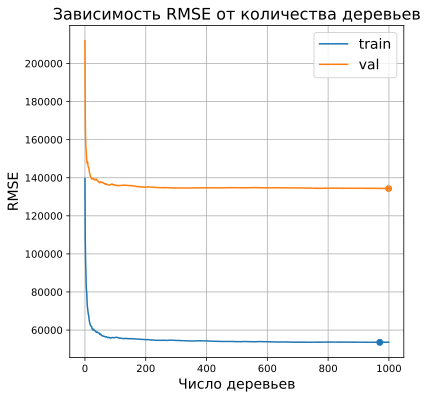

In [225]:
plt.figure(figsize=(6,6))
plt.title('Зависимость RMSE от количества деревьев', fontsize=16)
plt.plot(rmse_train11, label='train')
plt.scatter(np.argmin(rmse_train11), np.min(rmse_train11))
plt.plot(rmse_val11, label='val')
plt.scatter(np.argmin(rmse_val11), np.min(rmse_val11))
plt.grid(True)
plt.legend(fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xlabel('Число деревьев', fontsize=14)
plt.show()

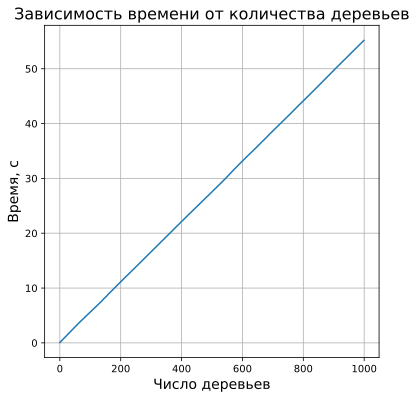

In [226]:
plt.figure(figsize=(6,6))
plt.title('Зависимость времени от количества деревьев', fontsize=16)
plt.plot(time11)
plt.grid(True)
plt.ylabel('Время, c', fontsize=14)
plt.xlabel('Число деревьев', fontsize=14)
plt.show()

## градиентный бустинг

In [233]:
modelGB = GradientBoostingMSE(n_estimators=1000, random_state=random_state)
rmse_train12, rmse_val12, time12 = modelGB.fit(X_train, y_train, X_val, y_val, trace=True)

In [234]:
np.min(rmse_val12), np.argmin(rmse_val12)

(120445.2535395941, 989)

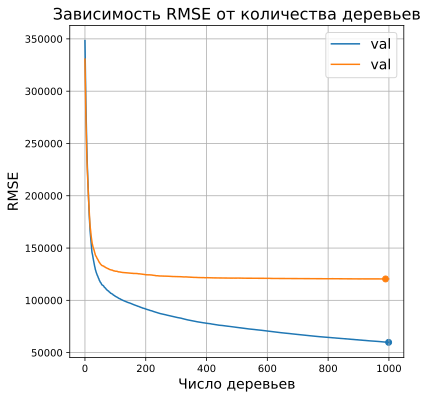

In [235]:
plt.figure(figsize=(6,6))
plt.title('Зависимость RMSE от количества деревьев', fontsize=16)
plt.plot(rmse_train12, label='val')
plt.scatter(np.argmin(rmse_train12), np.min(rmse_train12))
plt.plot(rmse_val12, label='val')
plt.scatter(np.argmin(rmse_val12), np.min(rmse_val12))
plt.grid(True)
plt.legend(fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xlabel('Число деревьев', fontsize=14)
plt.show()

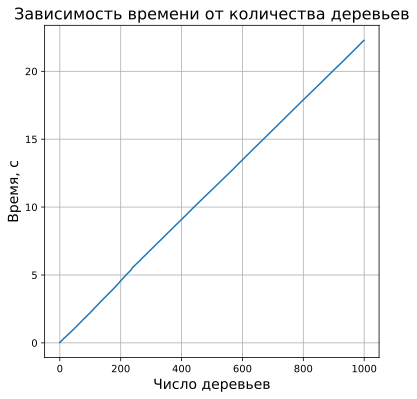

In [236]:
plt.figure(figsize=(6,6))
plt.title('Зависимость времени от количества деревьев', fontsize=16)
plt.plot(time12)
plt.grid(True)
plt.ylabel('Время, c', fontsize=14)
plt.xlabel('Число деревьев', fontsize=14)
plt.show()

# Исследование поведения в зависимости от размерности подвыборки признаков для одного дерева

## случайный лес

In [237]:
feature_subsample_size = [3, 7, 11, 15, 19]
rmse_train21, rmse_val21, time21 = [], [], []
for i in feature_subsample_size:
    modelRF = RandomForestMSE(n_estimators=1000, feature_subsample_size=i, random_state=random_state)
    rmse_t, rmse_v, time = modelRF.fit(X_train, y_train, X_val, y_val, trace=True)
    rmse_train21.append(rmse_t)
    rmse_val21.append(rmse_v)
    time21.append(time)

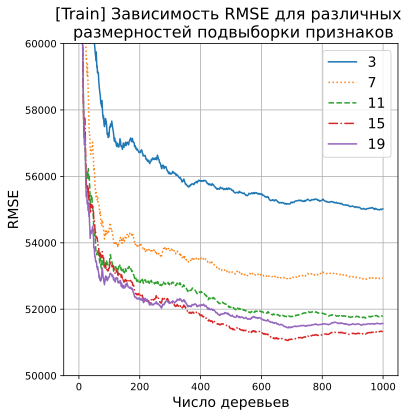

In [241]:
plt.figure(figsize=(6,6))
plt.title('[Train] Зависимость RMSE для различных \n размерностей подвыборки признаков', fontsize=16)

linestyle_str = ['solid','dotted', 'dashed', 'dashdot'] 
for i in range(5):
    plt.plot(rmse_train21[i], linestyle=linestyle_str[i%4], label=str(feature_subsample_size[i]))
plt.grid(True)
plt.ylim((50000, 60000))
plt.legend(fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xlabel('Число деревьев', fontsize=14)
plt.show()

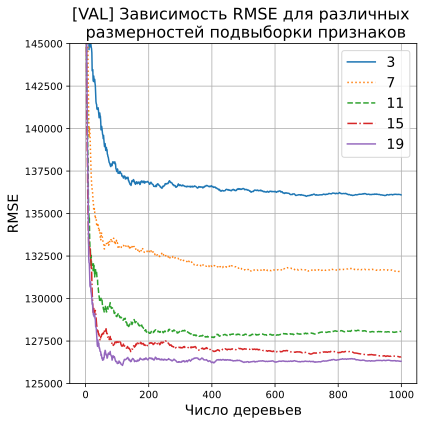

In [253]:
plt.figure(figsize=(6,6))
plt.title('[VAL] Зависимость RMSE для различных \n размерностей подвыборки признаков', fontsize=16)

linestyle_str = ['solid','dotted', 'dashed', 'dashdot'] 
for i in range(5):
    plt.plot(rmse_val21[i], linestyle=linestyle_str[i%4], label=str(feature_subsample_size[i]))
plt.grid(True)
plt.ylim((125000, 145000))
plt.legend(fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xlabel('Число деревьев', fontsize=14)
plt.tight_layout()
plt.show()

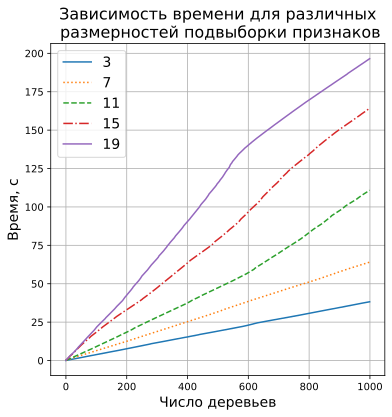

In [256]:
plt.figure(figsize=(6,6))
plt.title('Зависимость времени для различных\n размерностей подвыборки признаков', fontsize=16)

linestyle_str = ['solid','dotted', 'dashed', 'dashdot'] 
for i in range(5):
    plt.plot(time21[i], linestyle=linestyle_str[i%4], label=str(feature_subsample_size[i]))
plt.grid(True)
plt.ylabel('Время, c', fontsize=14)
plt.xlabel('Число деревьев', fontsize=14)
plt.legend(fontsize=14)
plt.show()

## градиентный бустинг

In [267]:
rmse_train22, rmse_val22, time22 = [], [], []
for i in feature_subsample_size:
    modelGB = GradientBoostingMSE(n_estimators=1000, feature_subsample_size=i, random_state=random_state)
    rmse_t, rmse_v, time = modelGB.fit(X_train, y_train, X_val, y_val, trace=True)
    rmse_train22.append(rmse_t)
    rmse_val22.append(rmse_v)
    time22.append(time)

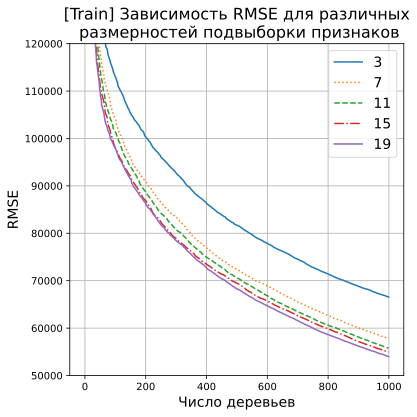

In [270]:
plt.figure(figsize=(6,6))
plt.title('[Train] Зависимость RMSE для различных\n размерностей подвыборки признаков', fontsize=16)

linestyle_str = ['solid','dotted', 'dashed', 'dashdot'] 
for i in range(5):
    plt.plot(rmse_train22[i], linestyle=linestyle_str[i%4], label=str(feature_subsample_size[i]))
plt.grid(True)
plt.legend(fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.ylim((50000, 120000))
plt.xlabel('Число деревьев', fontsize=14)
plt.show()

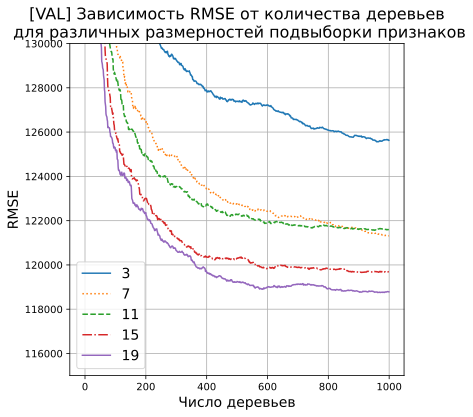

In [274]:
plt.figure(figsize=(6,6))
plt.title('[VAL] Зависимость RMSE от количества деревьев\n для различных размерностей подвыборки признаков', fontsize=16)

linestyle_str = ['solid','dotted', 'dashed', 'dashdot'] 
for i in range(5):
    plt.plot(rmse_val22[i], linestyle=linestyle_str[i%4], label=str(feature_subsample_size[i]))
plt.ylim((115000, 130000))
plt.grid(True)
plt.legend(fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xlabel('Число деревьев', fontsize=14)
plt.show()

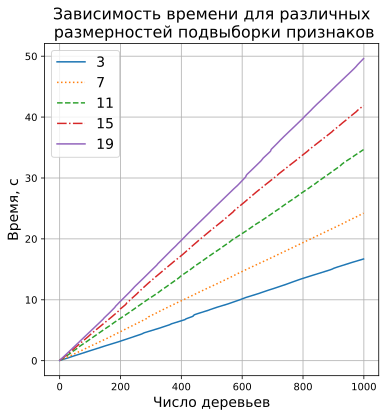

In [276]:
plt.figure(figsize=(6,6))
plt.title('Зависимость времени для различных\n размерностей подвыборки признаков', fontsize=16)

linestyle_str = ['solid','dotted', 'dashed', 'dashdot'] 
for i in range(5):
    plt.plot(time22[i], linestyle=linestyle_str[i%4], label=str(feature_subsample_size[i]))
plt.grid(True)
plt.legend(fontsize=14)
plt.ylabel('Время, c', fontsize=14)
plt.xlabel('Число деревьев', fontsize=14)
plt.show()

# Исследование поведения в зависимости от максимальной глубины дерева

## случайный лес

In [285]:
max_depth = [None, 8, 11, 14]
rmse_train31, rmse_val31, time31 = [], [], []
for i in max_depth:
    modelRF = RandomForestMSE(n_estimators=1000, max_depth=i, feature_subsample_size=19, random_state=random_state)
    rmse_t, rmse_v, time = modelRF.fit(X_train, y_train, X_val, y_val, trace=True)
    rmse_train31.append(rmse_t)
    rmse_val31.append(rmse_v)
    time31.append(time)

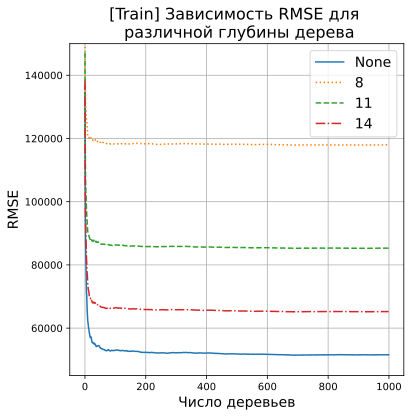

In [288]:
plt.figure(figsize=(6,6))
plt.title('[Train] Зависимость RMSE для \n различной глубины дерева', fontsize=16)

linestyle_str = ['solid','dotted', 'dashed', 'dashdot'] 
for i in range(4):
    plt.plot(rmse_train31[i], linestyle=linestyle_str[i%4], label=str(max_depth[i]))
plt.ylim((45000, 150000))
plt.grid(True)
plt.legend(fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xlabel('Число деревьев', fontsize=14)
plt.show()

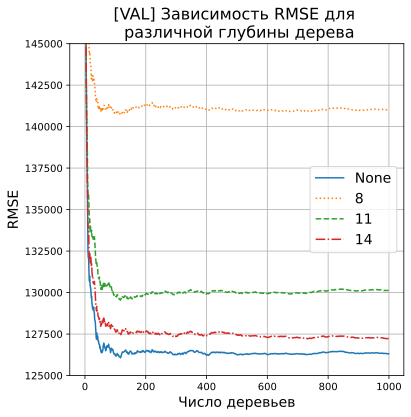

In [292]:
plt.figure(figsize=(6,6))
plt.title('[VAL] Зависимость RMSE для \n различной глубины дерева', fontsize=16)

linestyle_str = ['solid','dotted', 'dashed', 'dashdot'] 
for i in range(4):
    plt.plot(rmse_val31[i], linestyle=linestyle_str[i%4], label=str(max_depth[i]))
plt.ylim((125000, 145000))
plt.grid(True)
plt.legend(fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xlabel('Число деревьев', fontsize=14)
plt.show()

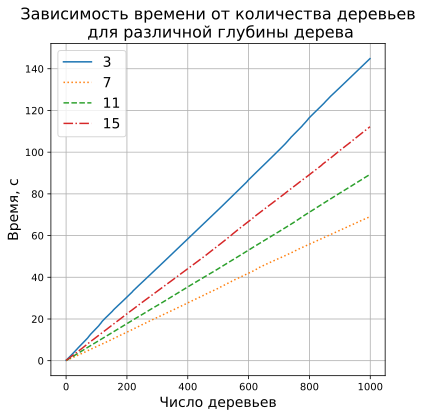

In [293]:
plt.figure(figsize=(6,6))
plt.title('Зависимость времени от количества деревьев\n для различной глубины дерева', fontsize=16)

linestyle_str = ['solid','dotted', 'dashed', 'dashdot'] 
for i in range(4):
    plt.plot(time31[i], linestyle=linestyle_str[i%4], label=str(max_depth[i]))
plt.grid(True)
plt.legend(fontsize=14)
plt.ylabel('Время, c', fontsize=14)
plt.xlabel('Число деревьев', fontsize=14)
plt.show()

## градиентный бустинг

In [299]:
from tqdm import tqdm
max_depth = [2, 5, 7, 9]
rmse_train32, rmse_val32, time32 = [], [], []
for i in tqdm(max_depth):
    modelGB = GradientBoostingMSE(n_estimators=1000, max_depth=i, feature_subsample_size=19, random_state=random_state)
    rmse_t, rmse_v, time = modelGB.fit(X_train, y_train, X_val, y_val, trace=True)
    rmse_train32.append(rmse_t)
    rmse_val32.append(rmse_v)
    time32.append(time)

100%|██████████| 4/4 [08:29<00:00, 127.30s/it]


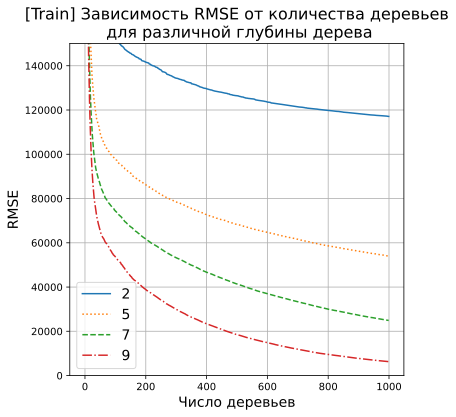

In [304]:
plt.figure(figsize=(6,6))
plt.title('[Train] Зависимость RMSE от количества деревьев\n для различной глубины дерева', fontsize=16)

linestyle_str = ['solid','dotted', 'dashed', 'dashdot'] 
for i in range(4):
    plt.plot(rmse_train32[i], linestyle=linestyle_str[i%4], label=str(max_depth[i]))
plt.ylim((0000, 150000))
plt.grid(True)
plt.legend(fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xlabel('Число деревьев', fontsize=14)
plt.show()

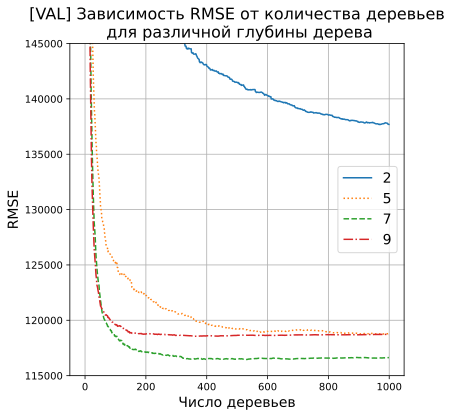

In [310]:
plt.figure(figsize=(6,6))
plt.title('[VAL] Зависимость RMSE от количества деревьев\n для различной глубины дерева', fontsize=16)

linestyle_str = ['solid','dotted', 'dashed', 'dashdot'] 
for i in range(4):
    plt.plot(rmse_val32[i], linestyle=linestyle_str[i%4], label=str(max_depth[i]))
plt.ylim((115000, 145000))
plt.grid(True)
plt.legend(fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xlabel('Число деревьев', fontsize=14)
plt.show()

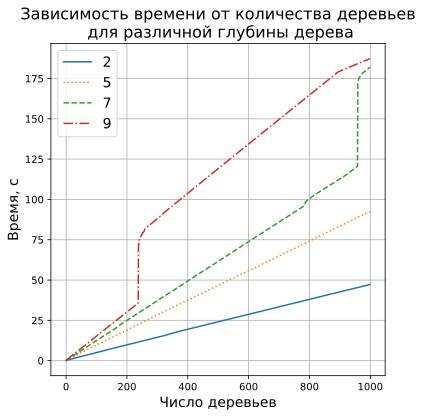

In [311]:
plt.figure(figsize=(6,6))
plt.title('Зависимость времени от количества деревьев\n для различной глубины дерева', fontsize=16)

linestyle_str = ['solid','dotted', 'dashed', 'dashdot'] 
for i in range(4):
    plt.plot(time32[i], linestyle=linestyle_str[i%4], label=str(max_depth[i]))
plt.grid(True)
plt.legend(fontsize=14)
plt.ylabel('Время, c', fontsize=14)
plt.xlabel('Число деревьев', fontsize=14)
plt.show()

# Исследование поведения градиентного бустинга в зависимости от выбранного $learning\_rate$

In [316]:
lr = [0.01, 0.1, 0.5, 1]
rmse_train4, rmse_val4, time4 = [], [], []
for i in lr:
    modelRF = GradientBoostingMSE(n_estimators=1000, learning_rate=i, max_depth=7, feature_subsample_size=19, random_state=random_state)
    rmse_t, rmse_v, time = modelRF.fit(X_train, y_train, X_val, y_val, trace=True)
    rmse_train4.append(rmse_t)
    rmse_val4.append(rmse_v)
    time4.append(time)

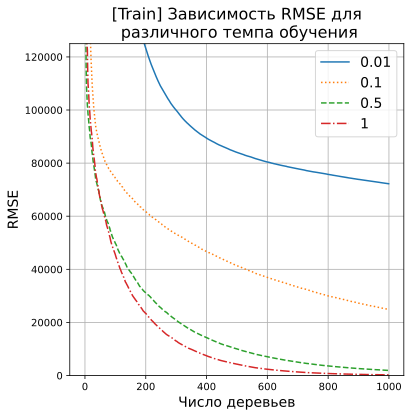

In [321]:
plt.figure(figsize=(6,6))
plt.title('[Train] Зависимость RMSE для\n различного темпа обучения', fontsize=16)

linestyle_str = ['solid','dotted', 'dashed', 'dashdot'] 
for i in range(4):
    plt.plot(rmse_train4[i], linestyle=linestyle_str[i%4], label=str(lr[i]))
plt.ylim((0, 125000))
plt.grid(True)
plt.legend(fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xlabel('Число деревьев', fontsize=14)
plt.show()

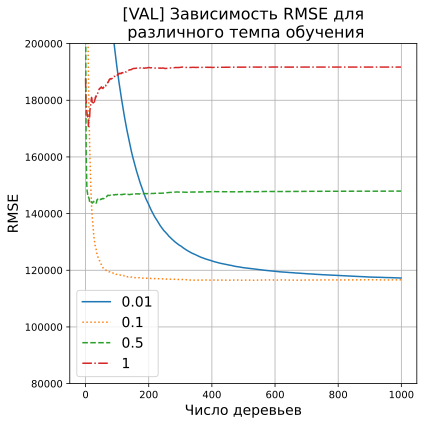

In [329]:
plt.figure(figsize=(6,6))
plt.title('[VAL] Зависимость RMSE для\n различного темпа обучения', fontsize=16)

linestyle_str = ['solid','dotted', 'dashed', 'dashdot'] 
for i in range(4):
    plt.plot(rmse_val4[i], linestyle=linestyle_str[i%4], label=str(lr[i]))
plt.ylim((80000, 200000))
plt.grid(True)
plt.legend(fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xlabel('Число деревьев', fontsize=14)
plt.tight_layout()
plt.show()

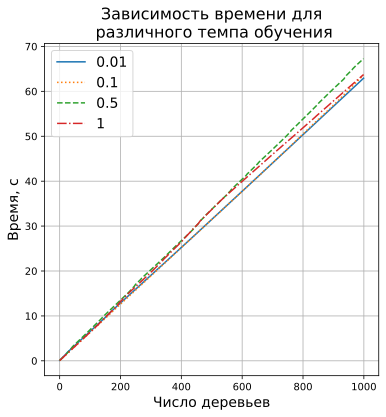

In [331]:
plt.figure(figsize=(6,6))
plt.title('Зависимость времени для\n различного темпа обучения', fontsize=16)

linestyle_str = ['solid','dotted', 'dashed', 'dashdot'] 
for i in range(4):
    plt.plot(time4[i], linestyle=linestyle_str[i%4], label=str(lr[i]))
plt.grid(True)
plt.legend(fontsize=14)
plt.ylabel('Время, c', fontsize=14)
plt.xlabel('Число деревьев', fontsize=14)
plt.show()